In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

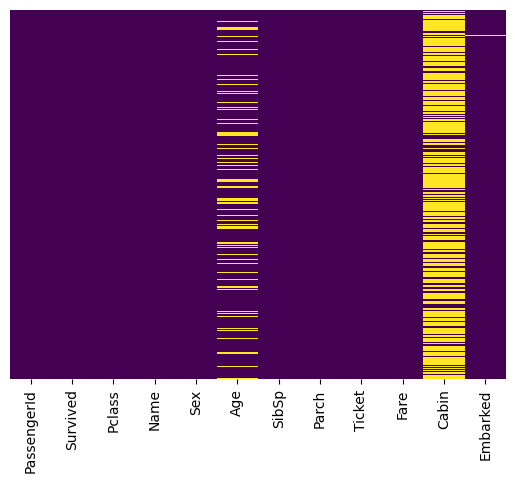

In [5]:
sns.heatmap(train.isnull(), yticklabels=False , cbar=False , cmap='viridis')

/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47505/3808207139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data = train , palette='rainbow')


<Axes: xlabel='Survived', ylabel='count'>

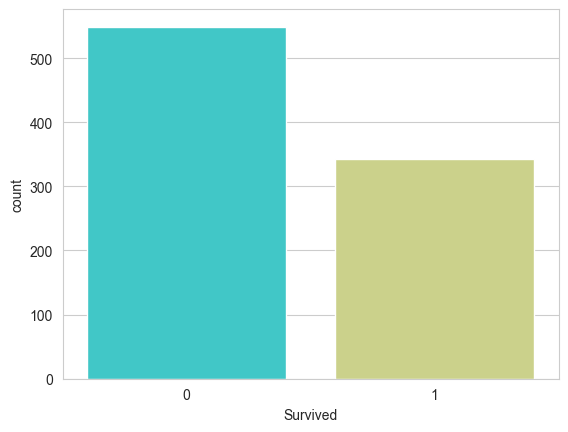

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train , palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

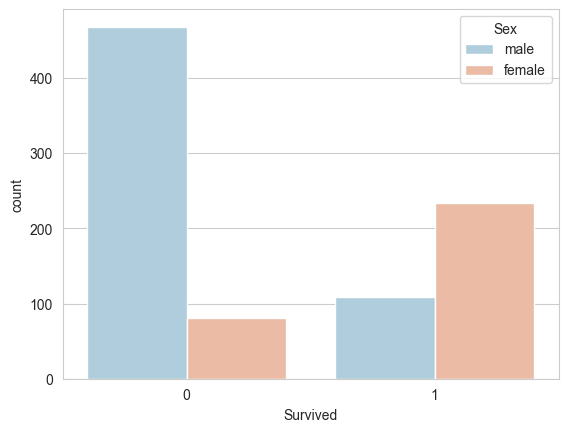

In [7]:
sns.countplot(x = 'Survived', data = train , hue='Sex', palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

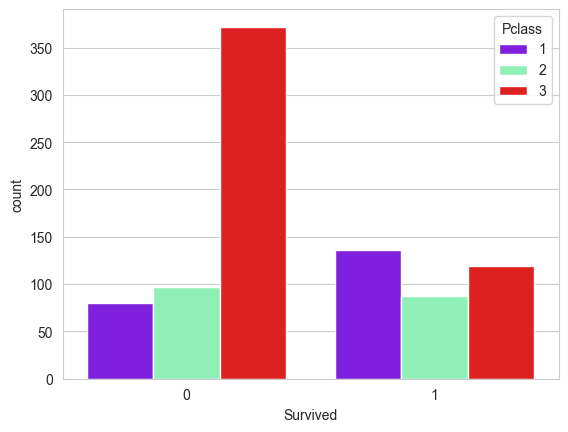

In [9]:
# Based on the Passenger Classes 
sns.set_style('whitegrid')
sns.countplot(x='Survived' , data = train , hue = 'Pclass' , palette='rainbow')

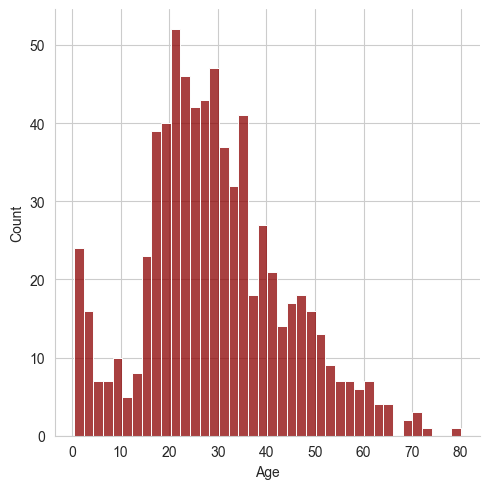

In [14]:
sns.displot(train['Age'].dropna() , kde= False , color='darkred', bins = 40)

<Axes: >

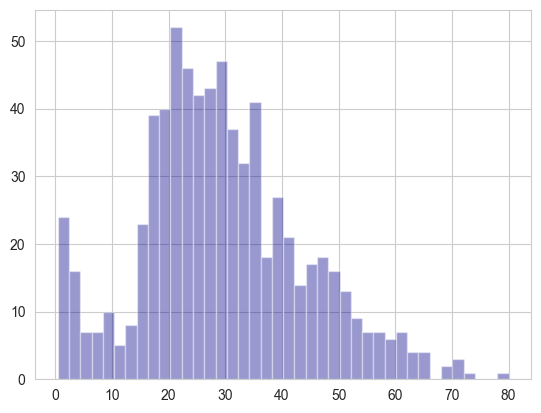

In [22]:
train['Age'].hist(bins = 40 , color = 'darkblue' , alpha = 0.4 )

/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47505/903162515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'SibSp', data  = train ,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

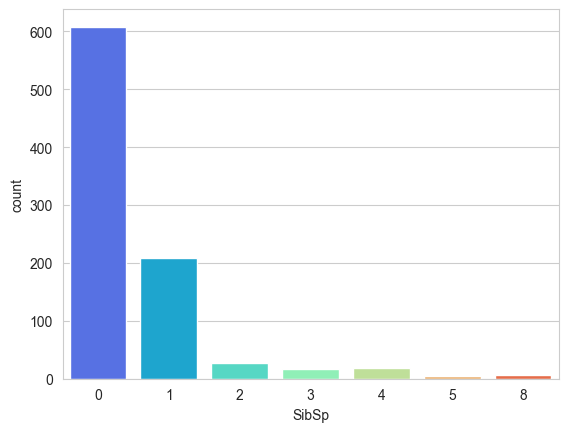

In [21]:
sns.countplot(x = 'SibSp', data  = train ,palette='rainbow')

<Axes: >

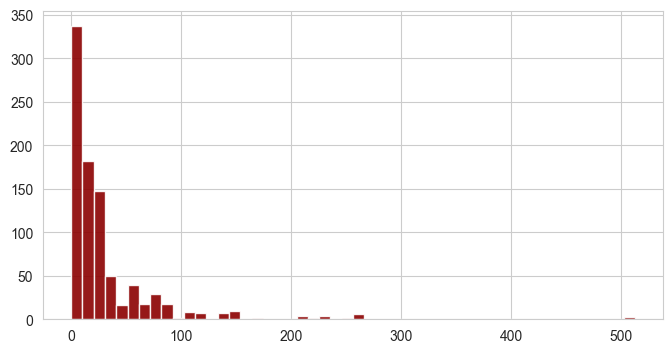

In [29]:
train['Fare'].hist(bins = 50, color ='darkred' , alpha = 0.9 , figsize=(8,4))

/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47505/3622743917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass' , y = 'Age' , data = train , palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

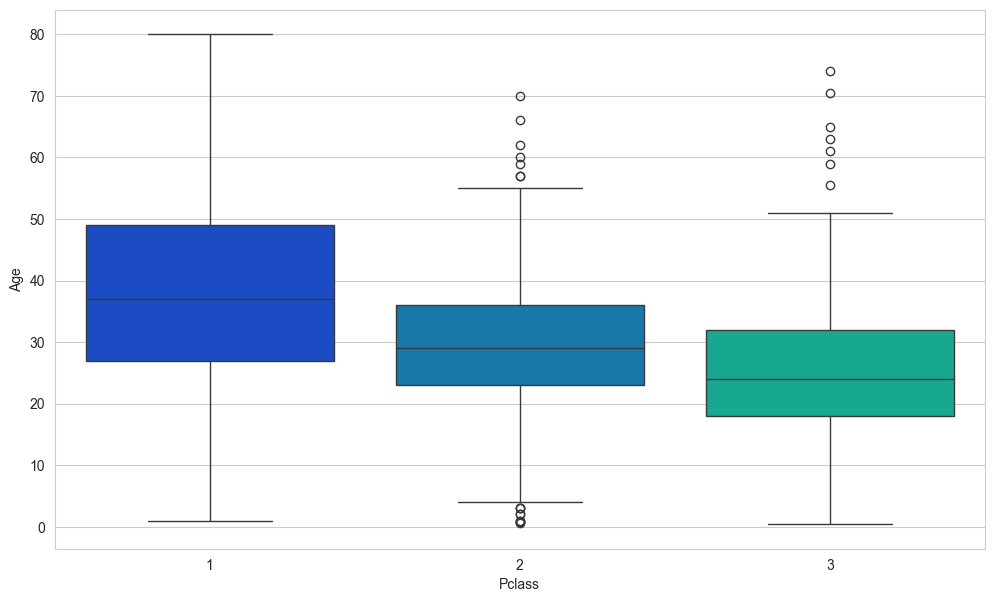

In [30]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train , palette='winter')

In [31]:
def input_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if Pclass ==1 :
            return 37
        elif Pclass == 2:
            return 27
        else :
            return 24
    else :
        return Age

In [32]:
train['Age'] = train[['Age' , 'Pclass']].apply(input_age,axis = 1)


/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47505/613070723.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47505/613070723.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

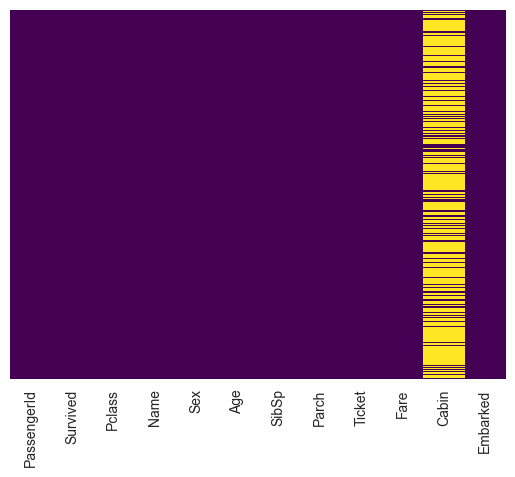

In [33]:
sns.heatmap(train.isnull(), yticklabels=False , cbar=False , cmap='viridis')

In [40]:
# Since the null values are too high in the cabin feature so we can drop that value 
train.drop('Cabin' , axis = 1 , inplace = True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

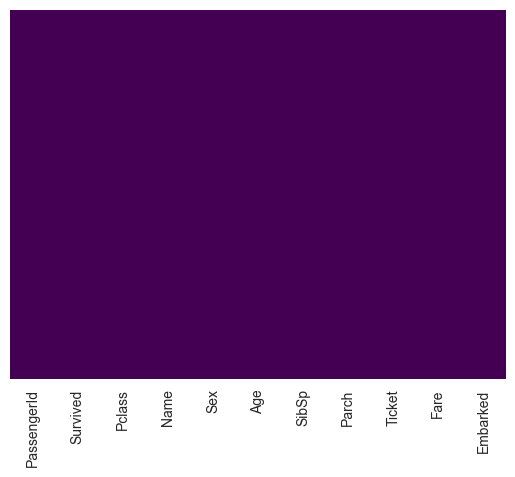

In [42]:
sns.heatmap(train.isnull(), yticklabels=False , cbar=False , cmap='viridis')

In [43]:
train.dropna(inplace = True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
pd.get_dummies(train['Embarked'], drop_first=True , dtype=int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
sex = pd.get_dummies(train['Sex'] , drop_first=True , dtype = int)
embarked = pd.get_dummies(train['Embarked'], drop_first=True , dtype=int)

In [49]:
train.drop(['Sex' , 'Embarked' , 'Name' , 'Ticket'], axis = 1 , inplace = True)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [51]:
train = pd.concat([train,sex,embarked] , axis= 1)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Now Our Data is ready for the model 